In [1]:
import numpy as np
import pandas as pd

from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise import SVD, KNNWithZScore, KNNBasic
from surprise import Dataset
from surprise import accuracy
from surprise import dump
import matplotlib.pyplot as plt
import matplotlib

In [2]:
final_data = pd.read_csv("../librarydata/rename.csv", encoding='utf-8',index_col=0)

In [3]:
book_count = pd.read_csv("../librarydata/book_count.csv",encoding='utf-8',index_col=0)

In [4]:
user_item = pd.read_csv("../librarydata/user_item_rename.csv", encoding='utf-8', index_col=0)

In [32]:
book_count.head(5)

,bookname,count
0,PowerPoint 97 中文版傻瓜书A Powerpoint 97 Zhong Wen...,1
1,Pro/ENGINEER Wildfire (中文版) 工程图设计,1
2,伦理学,1
3,寂静的春天,1
4,战争指导,1


In [16]:
user_item["bookname"].head(5)

0                                              [30599]
1                                 [12100, 5148, 12100]
2                         [38893, 38890, 38891, 38892]
3             [14433, 9888, 41098, 9889, 41101, 14444]
4    [53000, 53000, 49304, 51402, 19777, 41129, 461...
Name: bookname, dtype: object

In [8]:
user_item["bookname"]=user_item["bookname"].apply(lambda x: eval(x))

In [9]:
final_data["count"] = False

In [10]:
for i in final_data.index:
    if len(user_item["bookname"][int(final_data["name"][i])]) <=10 and book_count["count"][int(final_data["bookname"][i])] <= 10:
        final_data.iloc[i,8] = True
    else:
        continue

In [11]:
final_data[(final_data["count"]==True)]

,name,bookname,category,day,minute,rank,time,timestamp,count
0,12495,13720,7-5051-0077-7,2010-01-04,13:50:27,1,2010-01-04 13:50:27,1.262584e+09,True
5,15176,48565,7-01-000172-3,2010-01-12,09:17:39,2,2010-01-12 09:17:39,1.263259e+09,True
13,15971,22666,7-80034-321-9,2010-01-11,12:24:29,2,2010-01-11 12:24:29,1.263184e+09,True
14,9168,22666,7-80034-321-9,2010-01-07,10:42:26,2,2010-01-07 10:42:26,1.262832e+09,True
15,1566,41272,7-80513-138-4,2010-01-12,15:24:32,2,2010-01-12 15:24:32,1.263281e+09,True
19,1572,41272,7-80513-138-4,2010-01-10,15:01:10,2,2010-01-10 15:01:10,1.263107e+09,True
26,15962,20167,15034.3159,2010-01-11,12:30:33,5,2010-01-11 12:30:33,1.263184e+09,True
27,241,20167,15034.3159,2010-01-11,14:58:13,5,2010-01-11 14:58:13,1.263193e+09,True
29,8732,28487,7-111-03181-4,2010-01-13,14:05:09,1,2010-01-13 14:05:09,1.263363e+09,True
30,13174,42914,7-111-01245-3,2010-01-11,11:39:31,2,2010-01-11 11:39:31,1.263181e+09,True


In [23]:
user_item.head(5)

,bookname
0,[30599]
1,"[12100, 5148, 12100]"
2,"[38893, 38890, 38891, 38892]"
3,"[14433, 9888, 41098, 9889, 41101, 14444]"
4,"[53000, 53000, 49304, 51402, 19777, 41129, 461..."


In [12]:
final_data = final_data[(final_data["count"]==False)]

In [13]:
final_data = final_data[["name","bookname","timestamp","rank"]]

In [14]:
final_data.to_csv("../librarydata/follow_surprise.csv",encoding='utf-8')

In [12]:
final_data = pd.read_csv("../librarydata/follow_surprise.csv",encoding='utf-8')

In [17]:
final_data = final_data.reindex(np.random.permutation(final_data.index))

In [14]:
final_data = final_data[["name","bookname","timestamp","rank"]]

In [18]:
final_data.head(5)

,name,bookname,timestamp,rank
114221,5210,13136,1.276345e+09,1
709,8528,52239,1.263355e+09,3
18186,2061,2772,1.263528e+09,2
106096,754,36207,1.275208e+09,2
129205,1766,39117,1.278125e+09,1


In [19]:
# Creation of the dataframe. Column names are irrelevant.
df = pd.DataFrame(final_data)

# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df[["name","bookname","rank"]], reader)

# We can now use this dataset as we please, e.g. calling cross_validate
# cross_validate(NormalPredictor(), data, cv=2)

In [20]:
trainset, testset = train_test_split(data, test_size=.01)

In [21]:
trainset.all_items()

range(0, 45525)

In [26]:

algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 0.8445


0.8445360426879

In [23]:
algo = KNNBasic(sim_options={'user_based':True})

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0904


1.0903983480812682

In [ ]:
for i in final_data.index:
    uid=final_data["name"][i]
    iid=final_data["bookname"][i]
    pred = algo.predict(uid, iid, r_ui=final_data["rank"][i], verbose=True)

In [29]:
i = 100088
uid=final_data["name"][i]
iid=final_data["bookname"][i]
pred = algo.predict(uid, iid, verbose=True)
# type(pred.est)

user: 7352       item: 48758      r_ui = None   est = 2.31   {'was_impossible': False}


In [24]:
algo

In [100]:
dump.dump("../librarydata/model.md", algo=algo, predictions=predictions)

In [91]:
dump.dump("../librarydata/model_knn.md", algo=algo_knn, predictions=predictions_knn)

In [7]:
predictions, algo = dump.load("../librarydata/model.md")

In [19]:
for i in algo.compute_baselines():
    print(len(i))

12414
44884


In [36]:
for i in algo.get_neighbors(12000,5):
    print(book_count["bookname"][i])

2009年全国一、二级注册建筑师考试模拟题解.1,知识.第4版
AutoCAD建筑三维建模技术
Cisco网络技术教程
Cisco路由器防火墙安全
D-妖杀行


In [22]:
a = algo.compute_similarities()

Computing the msd similarity matrix...
Done computing similarity matrix.


In [34]:
import matplotlib.pyplot as plt

In [39]:
accuracy.rmse(predictions)

RMSE: 0.8552


0.8552312232321825

In [24]:
algo_knn = KNNBasic()

# Train the algorithm on the trainset, and predict ratings for the testset
algo_knn.fit(trainset)
predictions_knn = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions_knn)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0904


1.0903983480812682

In [87]:
trainset.all_items()

range(0, 45481)

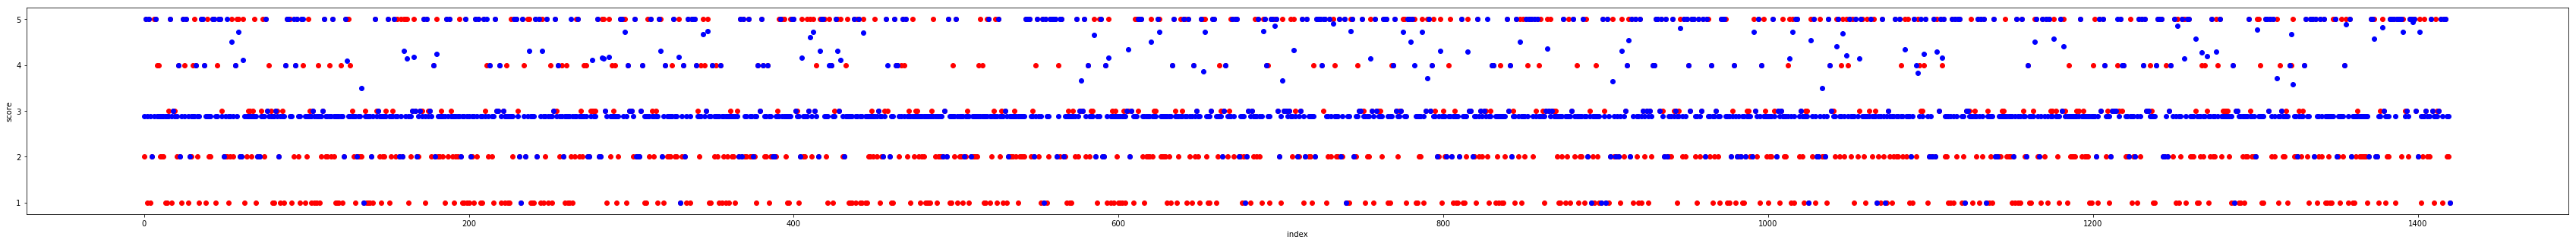

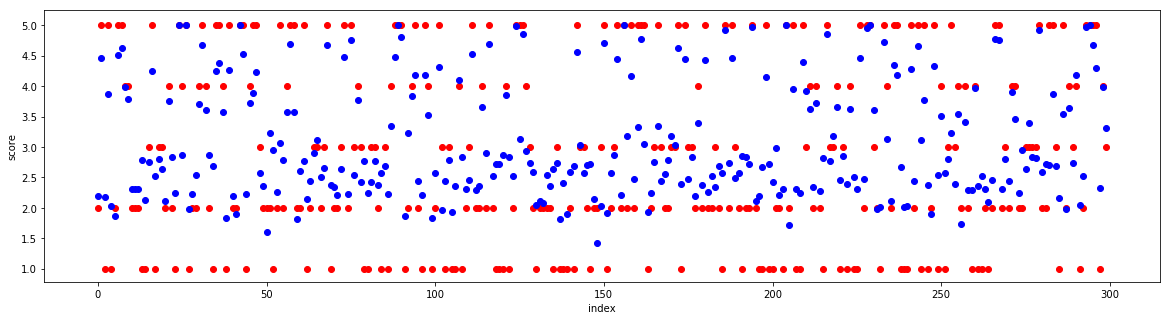

In [33]:
# Fixing random state for reproducibility
x = range(0,len(predictions_knn))
y_ui = [x.r_ui for x in predictions_knn]
y_est = [x.est for x in predictions_knn]
plt.figure(0,figsize=(60,5))
plt.scatter(x, y_ui, c='red')
plt.scatter(x, y_est, c='blue')
plt.xlabel("index")
plt.ylabel("score")
# plt.legend(loc=2)
plt.show()
plt.close(0)
x = range(0,len(predictions))[:300]
y_ui = [x.r_ui for x in predictions][:300]
y_est = [x.est for x in predictions][:300]
plt.figure(1,figsize=(20,5))
plt.scatter(x, y_ui, c='red')
plt.scatter(x, y_est, c='blue')
plt.xlabel("index")
plt.ylabel("score")
# plt.legend(loc=2)
plt.show()

In [37]:
baselines = algo_knn.compute_similarities()

Computing the msd similarity matrix...
Done computing similarity matrix.
